# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
print(response)

<Response [200]>


In [4]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1551985383000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.7.0","count":294},"features":[{"type":"Feature","properties":{"mag":2.5,"place":"83km SSW of Kaktovik, Alaska","time":1551982140739,"updated":1551982844598,"tz":-540,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/ak01931g8mzd","detail":"https://earthquake.usgs.gov/e


In [5]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [6]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 2.5, 'place': '83km SSW of Kaktovik, Alaska', 'time': 1551982140739, 'updated': 1551982844598, 'tz': -540, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak01931g8mzd', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak01931g8mzd.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 96, 'net': 'ak', 'code': '01931g8mzd', 'ids': ',ak01931g8mzd,', 'sources': ',ak,', 'types': ',geoserve,origin,', 'nst': None, 'dmin': None, 'rms': 0.78, 'gap': None, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 2.5 - 83km SSW of Kaktovik, Alaska'}, 'geometry': {'type': 'Point', 'coordinates': [-144.3616, 69.4288, 9.6]}, 'id': 'ak01931g8mzd'}


In [7]:
# print it more clearly
#1st quake
pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-144.3616, 69.4288, 9.6], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '01931g8mzd',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak01931g8mzd.geojson',
 'dmin': None,
 'felt': None,
 'gap': None,
 'ids': ',ak01931g8mzd,',
 'mag': 2.5,
 'magType': 'ml',
 'mmi': None,
 'net': 'ak',
 'nst': None,
 'place': '83km SSW of Kaktovik, Alaska',
 'rms': 0.78,
 'sig': 96,
 'sources': ',ak,',
 'status': 'automatic',
 'time': 1551982140739,
 'title': 'M 2.5 - 83km SSW of Kaktovik, Alaska',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,',
 'tz': -540,
 'updated': 1551982844598,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak01931g8mzd'}


In [8]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.5 - 83km SSW of Kaktovik, Alaska
M 2.9 - 66km SSW of Kobuk, Alaska
M 4.7 - 90km W of False Pass, Alaska
M 5.7 - 134km SSE of L'Esperance Rock, New Zealand
M 3.3 - 74km S of Kobuk, Alaska
M 3.0 - 23km SSW of Beaver, Utah
M 5.7 - 138km WNW of Coquimbo, Chile
M 5.5 - 252km SE of L'Esperance Rock, New Zealand
M 3.2 - 31km NNE of Road Town, British Virgin Islands
M 2.8 - 4km E of Blanchard, Oklahoma
M 3.2 - 33km SW of Hayfork, CA
M 4.9 - 118km SE of L'Esperance Rock, New Zealand
M 2.7 - 10km WSW of Knik-Fairview, Alaska
M 4.8 - Izu Islands, Japan region
M 2.5 - 12km NNE of Ocotillo Wells, CA
M 4.8 - 96km SW of `Ohonua, Tonga
M 4.7 - 12km S of Roghun, Tajikistan
M 5.1 - 91km SW of Atka, Alaska
M 4.8 - 6km E of Fochville, South Africa
M 2.8 - 68km S of Kobuk, Alaska
M 4.6 - 37km SSE of Sindangsari, Indonesia
M 3.2 - 64km SSW of Kobuk, Alaska
M 2.6 - 6km N of Moreno Valley, CA
M 3.3 - 12km S of Big Lake, Alaska
M 4.4 - 12km N of Kashmor, Pakistan
M 3.4 - 46km NE of Road Town, British Virgi

In [9]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

294


In [10]:
# print the first few lines of data
#depth in meter

print(df.head())

   magnitude   depth
0        2.5    9.60
1        2.9    0.00
2        4.7  162.92
3        5.7   27.36
4        3.3    0.00


In [11]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  294.000000  294.000000
mean     3.708537   44.614048
std      1.027381   77.835422
min      2.450000   -0.450000
25%      2.800000   10.000000
50%      3.300000   15.745000
75%      4.600000   47.787500
max      7.000000  573.630000


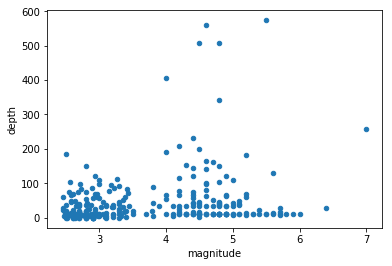

In [12]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [13]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [14]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   magnitude   depth
0        2.5    9.60
1        2.9    0.00
2        4.7  162.92
3        5.7   27.36
4        3.3    0.00


C:\Users\moni_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [15]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [16]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky','key':''}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky&key=


In [17]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [18]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You must use an API key to authenticate each request to '
                  'Google Maps Platform APIs. For additional information, '
                  'please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}


In [19]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [20]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [21]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *
#navita.io for key

In [22]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [23]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 2
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @KentuckyMBB: .@PJWashington is one of the top players in college basketball. It should come as no surprise then that he's a finalist fo…
RT @KentuckyWBB: Everything you need to know about our run in the SEC Tournament: https://t.co/aLNC2I6xQF #poWEr https://t.co/VQ2OW4PcR1


In [24]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Mar 07 17:58:17 +0000 2019',
 'entities': {'hashtags': [{'indices': [106, 112], 'text': 'poWEr'}],
              'symbols': [],
              'urls': [{'display_url': 'ukathletics.com/secwomen',
                        'expanded_url': 'http://ukathletics.com/secwomen',
                        'indices': [82, 105],
                        'url': 'https://t.co/aLNC2I6xQF'},
                       {'display_url': 'twitter.com/kentuckywbb/st…',
                        'expanded_url': 'https://twitter.com/kentuckywbb/status/1103398152965636097',
                        'indices': [113, 136],
                        'url': 'https://t.co/VQ2OW4PcR1'}],
              'user_mentions': [{'id': 56402878,
                                 'id_str': '56402878',
                                 'indices': [3, 15],
                                 'name': 'Kentucky WBB',
                                 'screen_name': 'KentuckyWBB'}]},
 

### Other API endpoints allow different types of searches

In [25]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Eddie Gran explains why he turned down Georgia to stay at Kentucky https://t.co/67yh7QpAbO via @DerekSTerry #BBN https://t.co/GqT2INIhNw

RT @EricThomas0523: Lol Will Wade. I pray this internal violation circus doesn’t affect your locker-room before we get our hands on you aga…

New ILB coach Jon Sumrall says coaching at alma mater 'gives me a little extra juice' https://t.co/3FdEKO3cWn via… https://t.co/FsTBCdjdsV

RT @JEdwar247: Cats offer three from California including the No. 3 player overall - https://t.co/GQoTexrYyF #BBN https://t.co/cslOrmGuTw

Low pad level spring practice #3 in the books 📖 @ChristopherOats  #BBN #WILDCATS #Uk #supersophmore #DeuceDeuce https://t.co/RvtB4nuCSQ



In [26]:
# search for public tweets in bangla

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'bn', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@Hyounsuke খুবি ভয়ংকর

নন্দিনী পাওয়ার ওমেন ক্যাম্পেইনে ভাইচার ও ফ্রি ডেলিভারি https://t.co/jWzYT3lWd1 https://t.co/w60Ugv9onL

৭ই মার্চ ; বঙ্গবন্ধু ও বাংলাদেশ নিয়ে
বাংলা টিভিতে Bangla Talk এ
অন্যান্য অতিথিদের সাথে আমিও যখন
দেখতে পারেন- (… https://t.co/K0Pf7cK4tO

বঙ্গবন্ধুর ঐতিহাসিক ভাষণ স্বরণ ও শহীদদের প্রতি গভীর শ্রদ্ধা https://t.co/n0lcIlzG2O https://t.co/iIsIaig4gp

সন্দ্বীপে উপজেলা আ.লীগের ঐতিহাসিক ৭মার্চ পালিত https://t.co/0VCrg0BdJc



In [27]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@ColeBoyle3 hey lil buddy.... why ya hiding over there??? https://t.co/BwOBqgVenZ

I would like to scream

Students Make the Best Teachers! New BLOG! Students Make the Best Teachers  https://t.co/h4fau911BK

I hope Dr. Everett McCorvey sings the national anthem Saturday at Rupp Arena. He would be perfect for UK Senior Day… https://t.co/4TVMbwQBS0

Madama Butterfly 🦋
#Opera #GNO @ Singletary Center for the Arts https://t.co/XgxZUlBBB5

hbd justin bieber ( michael_rutherford_ ) hope you have the worst day ever cause you deserve it 🥴 swipe for a surpr… https://t.co/cKupMId15q

.@universityofky can you please turn on the heat in the graduate student study? It's hard to write dissertations wi… https://t.co/bzFJSE26lc



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

# Answer 1

In [28]:
# search for public tweets about #OSCAR in english

endpoint = 'search/tweets'
params = {
    'q': '#OSCAR', 
    'count': 5,
     'lang': 'en',
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Watch the #Oscar winning and #GoldenGlobe winning performance by #ReginaKing in #BarryJenkins If #BealeStreet Could… https://t.co/daZxOUz8UB

RT @wsyx6: #WakandaForever

The #Oscar for Best Original Score goes to @ludwiggoransson for @theblackpanther #Oscars #BlackPanther
https://…

RT @blkcreatives: After accepting his award from Sam + before telling the audience about our history + ancestors, #Oscar award-winning dire…

Watch my #redcarpet #oscars2019 #interviews at the #warnerbros #estate. #Congrats to the short #film #skin on their… https://t.co/FqMVpFMvNT

RT @filmmakerspod: Want to Make a Studio #IndieFilm ? Have a listen to this weeks podcast with  Hollywood #producer @JackBinder 

He tells…



In [29]:
# search for public tweets about #বাংলাদেশ in bangla
endpoint = 'search/tweets'
params = {
    'q': '#বাংলাদেশ', 
    'lang': 'bn', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

সকল দেশের রানী সে যে-
আমার জন্মভূমি....

#আমার #অহংকার 

#আমার #বাংলাদেশ

কে সে ? 
যে বলে আমরা (#বাংলাদেশ) আগাইনি?
ভারত, পাকিস্তান আমাদের ফলো করে 🙄

মেঠো পথ কি একেই বলে?! #বাংলাদেশ #BD #Rural #Village #Road #Trip https://t.co/HLUTttm4u9

#বাংলাদেশ
#ইপিআই
#টিটি
#টিডি
বর্তমানে ব্যবহৃত টিটি টিকার ভায়াল শেষ হলে সম্প্রসারিত টিকাদান কর্মসূচি (ইপিআই)-এর নি… https://t.co/NV1D00STgq

- ধর্ষণের সাজা....
#বাংলাদেশ
🚫 প্রতিবাদ
🚫 ফেসবুক স্ট্যাটাস
🚫 ধর্না
🚫 তদন্ত
🚫 সমঝোতার চেষ্টা
🚫 ঘুষ দেওয়া
🚫 ধমক-চমক… https://t.co/rAOmN1QF8S



# Answer 2

In [30]:
# more data fields

endpoint = 'search/tweets'
params = {
    'q': '#spring break',
    'location': 'University of Kentucky, Lexington, KY',
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

⭐️PROPERTY OF THE WEEK⭐️
This week, get prepared for #spring with a #peaceful break to the quaint and quiet Sealsba… https://t.co/dNcU2eZhcJ

RT @DaemenResLife: Residence Halls close Saturday the 9th @ 10 AM for Spring Break!! Have a safe break! Res halls re-open on the 17th at 10…

We are weeks away from the first day of #spring. Now is the time to start thinking about #springbreak - check out o… https://t.co/ZCHrq5AF5O

Yes! Enjoy #Spring Break but be safe. And don’t pass out in your contact lenses! https://t.co/Io1GRAiZ9n

Almost time to break out those skirts for spring 2019.

#spring
#springtime
#skirts

https://t.co/71NIKQuXNZ https://t.co/8QgpzNUyRT



In [36]:
# more data fields
endpoint = 'search/tweets'
params = {
    'q': '#happy',
    'date': '3/7/2019',
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

If u want to capture her vintage heart n soul , surrender yours. -Joseph colombrita #💞💫 #vintage #vintagesoul… https://t.co/glkPbcwmVB

RT @Madonna: 😂😂 #stella #estere #dance #happy @Pharrell https://t.co/N6xtwjOH9n

RT @4AMShower: Rainy days. Today’s smile goal: hold an umbrella up. 🦖🦊🐇 Support me making these comics at https://t.co/xoU612ZiFo :)

#happ…

Our beautiful babies😍 @VenturaIzaiah  Throwback Thursday❤  #tbt #ourbabies #kids #momlife #dadlife #happy #blessed… https://t.co/AbHjQCOGuJ



### Bonus: Streaming live tweets in real time 

In [32]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Thu Mar 07 19:04:12 +0000 2019
Krabi, Thailand, Thailand
ใจเทอมันบางเกิน

Thu Mar 07 19:04:12 +0000 2019
Campina Grande, Brasil, Brasil
@BrunoHenriqueff Que baixa

Thu Mar 07 19:04:12 +0000 2019
La Ligua, Chile, Chile
Láminas táctiles de sala para dioramas y murales de la #exposiciónpermanente #museolaligua #proyecto… https://t.co/RjIOpaxiEL

Thu Mar 07 19:04:12 +0000 2019
São Paulo, Brasil, Brasil
@FrutillitaDulc1 Gracias

Thu Mar 07 19:04:12 +0000 2019
La Plata, Argentina, Argentina
@marianoobarrio @MalenaStein @salvinamusica O sea: usted está planteando que es mas ético generar un niñe gravement… https://t.co/NgyLZuqe1V

Thu Mar 07 19:04:12 +0000 2019
İstanbul, Türkiye, Türkiye
Ne acıdır ki şu manzara Türkiyemizde artık olmuyor  🤔😥😣

Thu Mar 07 19:04:12 +0000 2019
Easton, MD, United States
@nikki_widen love you ❤️❤️

Thu Mar 07 19:04:12 +0000 2019
Digoin, France, France
si tu savais à quel point je te déteste tu serais a quel point je t'aime

Thu Mar 07 19:04:12 +0000 2019
São Gonça

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

# Answer 1

In [33]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'lat': [q['geometry']['coordinates'][0] for q in quakes],
     'long': [q['geometry']['coordinates'][1] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

294


In [34]:
df.head()

,lat,long
0,-144.3616,69.4288
1,-157.2174,66.3299
2,-164.8113,54.7878
3,-178.3749,-32.5605
4,-157.2005,66.2474


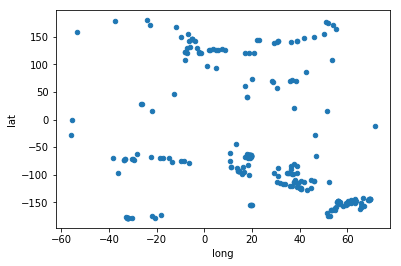

In [35]:
# plot the lat vs. long

df.plot(x='long', y='lat', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
